In [1]:
%load_ext autoreload
%autoreload 2
import sys
if ".." not in sys.path:
    sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import json
from signatures.tensor_algebra import TensorAlgebra
from signatures.tensor_sequence import TensorSequence
from models.sig_vol import SigVol
from products.vanilla_option import VanillaOption
from models.model_params import LewisParams
from signatures.shuffle import shuffle_product


from signatures.characteristic_function import psi_riccati, xi_riccati, psi_riccati_rk4, func_psi

/home/mr_giraffe/anaconda3/lib/python3.8/site-packages/py_lets_be_rational/numba_helper.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  return jit(*jit_args, **jit_kwargs)(fun)


In [2]:
import psutil
import os

# Create a function to get the current memory usage of the Python process
def memory_usage():
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Memory usage in MB

print(f"Current memory usage: {memory_usage()} MB")

Current memory usage: 243.46875 MB


In [3]:
%%time
ta = TensorAlgebra(dim=2)

Compiling...
Compilation finished.
CPU times: user 2min 37s, sys: 256 ms, total: 2min 37s
Wall time: 2min 38s


In [4]:
N = 12
Ø = ta.from_dict({"": 1}, trunc=N)
_1 = ta.from_dict({"1": 1}, trunc=N)
_2 = ta.from_dict({"2": 1}, trunc=N)
_11 = ta.from_dict({"11": 1}, trunc=N)
_12 = ta.from_dict({"12": 1}, trunc=N)
_21 = ta.from_dict({"21": 1}, trunc=N)
_22 = ta.from_dict({"22": 1}, trunc=N)
_222 = ta.from_word("222", trunc=N)
_221 = ta.from_word("221", trunc=N)
_121 = ta.from_word("121", trunc=N)
_211 = ta.from_word("211", trunc=N)
_2222 = ta.from_word("2222", trunc=N)
_22222 = ta.from_word("22222", trunc=N)

In [5]:
_12 = ta.from_dict({"12": 1}, trunc=12)
x = (_2 + _12).shuffle_prod(_2 + _12)

ta.print(_12)
ta.print(x)

1.0*12
2.0*22 + 4.0*122 + 2.0*212 + 4.0*1122 + 2.0*1212


In [12]:
N = 13

#ta = TensorAlgebra(dim=2)
Ø = ta.from_dict({"": 1}, trunc=N)
_12 = ta.from_dict({"12": 1}, trunc=N)
_21 = ta.from_dict({"21": 1}, trunc=N)
_1 = ta.from_dict({"1": 1}, trunc=N)
_2 = ta.from_dict({"2": 1}, trunc=N)

y = _2.shuffle_exp(2)

print(f"Current memory usage: {memory_usage()} MB")
x = (Ø + _1 + _2).tensor_exp(10)
print(x.indices.size)
print(f"Current memory usage: {memory_usage()} MB")
for i in range(40000):
    x = ta.alphabet.int_to_index(121212111212121112)
print(f"Current memory usage: {memory_usage()} MB")

Current memory usage: 846.20703125 MB
1023
Current memory usage: 846.20703125 MB
Current memory usage: 846.20703125 MB


In [13]:
N = 13

#ta = TensorAlgebra(dim=2)
Ø = ta.from_dict({"": 1}, trunc=N)
_12 = ta.from_dict({"12": 1}, trunc=N)
_21 = ta.from_dict({"21": 1}, trunc=N)
_1 = ta.from_dict({"1": 1}, trunc=N)
_2 = ta.from_dict({"2": 1}, trunc=N)

y = _2.shuffle_exp(2)

print(f"Current memory usage: {memory_usage()} MB")
x = (Ø + _1 + _2).tensor_exp(10)
print(x.indices.size)
print(f"Current memory usage: {memory_usage()} MB")
for i in range(4):
    x.update(x.tensor_prod(Ø + _21).tensor_prod((Ø + _1).tensor_exp(8)).shuffle_prod(_2))
    print(x.indices.size)
    print(f"Current memory usage: {memory_usage()} MB")

Current memory usage: 846.20703125 MB
1023
Current memory usage: 846.20703125 MB
10737
Current memory usage: 846.20703125 MB
14742
Current memory usage: 846.20703125 MB
15402
Current memory usage: 846.20703125 MB
14913
Current memory usage: 846.20703125 MB


### Model setup

In [4]:
N = 3
rho = -0.5

model = SigVol(model_type="log-normal", 
               vol_ts=0.2 * Ø + 0.01 * _1 + 0.1 * _2 + 0.05 * _11 + 0.05 * _12 + 0.05 * _22 + 0.01 * _222 + 0.03 * _221 + 0.01 * _121 + 0.01 * _211, 
               ta=ta, 
               sigmas=lambda t: np.ones((len(t), 1)), R=[[1]], rhos=[rho])

In [5]:
ta.print(model.vol_ts)

0.2*∅ + 0.01*1 + 0.1*2 + 0.05*11 + 0.05*12 + 0.05*22 + 0.01*121 + 0.01*211 + 0.03*221 + 0.01*222


In [7]:
import psutil
import os

# Create a function to get the current memory usage of the Python process
def memory_usage():
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Memory usage in MB

print(f"Current memory usage: {memory_usage()} MB")

Current memory usage: 500.296875 MB


In [9]:
import gc

for i in range(10):
    x = shuffle_product(12211221, 2221112122)
    print(f"Current memory usage: {memory_usage()} MB")
    
gc.collect()

Current memory usage: 697.02734375 MB
Current memory usage: 715.05859375 MB
Current memory usage: 733.08984375 MB
Current memory usage: 751.12109375 MB
Current memory usage: 769.1484375 MB
Current memory usage: 787.1796875 MB
Current memory usage: 805.20703125 MB
Current memory usage: 823.23828125 MB
Current memory usage: 841.26953125 MB
Current memory usage: 859.296875 MB


21

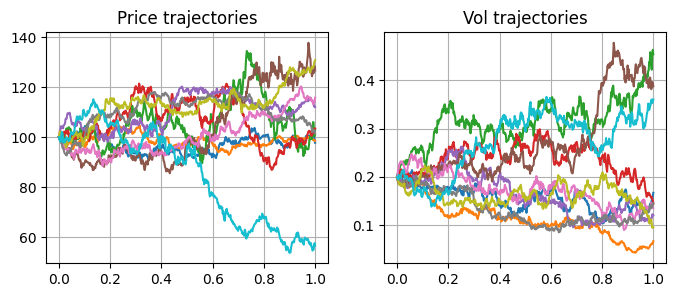

In [6]:
T = 1
F0 = 100

size = 10
N_grid = 500

t_grid = np.linspace(0, T, N_grid)
rng = np.random.default_rng(seed=42)
prices, vols = model.get_price_trajectory(t_grid=t_grid, size=size, F0=F0, rng=rng, return_vol=True)
prices

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
for price, vol in zip(prices, vols):
    ax[0].plot(t_grid, price)
    ax[1].plot(t_grid, vol)
ax[0].set_title("Price trajectories")
ax[1].set_title("Vol trajectories")
ax[0].grid()
ax[1].grid()

### Define the option 

In [155]:
T = 1
F0 = 100
K = np.array([90, 100, 110])

k = np.log(K / F0)

option = VanillaOption(T=T, K=K, flag="call")

### Pricing

In [156]:
%%time
smile_cf = option.get_price(model=model, method="lewis", F0=F0, is_vol_surface=True, 
                            pricing_params=LewisParams(cf_timestep=0.01))

NameError: name 'model' is not defined

In [157]:
%%timeit
smile_cf = option.get_price(model=model, method="lewis", F0=F0, is_vol_surface=True, 
                            pricing_params=LewisParams(cf_timestep=0.01))

NameError: name 'model' is not defined

[0.23867271 0.22459828 0.21390662]


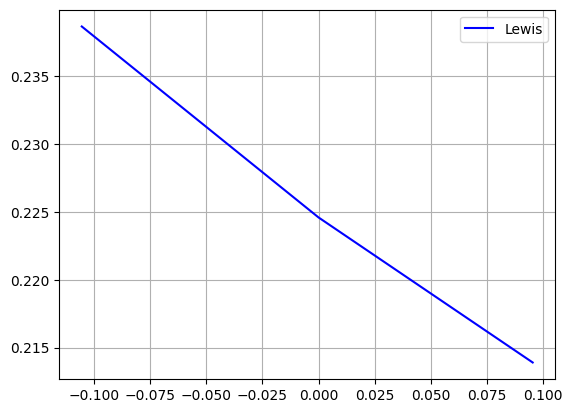

In [12]:
print(smile_cf)

fig, ax = plt.subplots()

ax.plot(np.log(K / F0), smile_cf, "b", label="Lewis")
ax.grid()
ax.legend()

## Signature characteristic function

In [38]:
T = 1
n = 1000
trunc = 12
u_coef = -1

t_grid = np.linspace(0, T, n)
u = ta.from_word("2222", trunc=trunc) * u_coef

In [39]:
rng = np.random.default_rng(seed=42)
W = np.concatenate([[0], np.cumsum(rng.normal(size=len(t_grid) - 1) * np.sqrt(np.diff(t_grid)))])
path = np.vstack([t_grid, W]).T

W_sig = ta.path_to_sequence(path=path, trunc=trunc)

#### Via MC

In [42]:
rng = np.random.default_rng(seed=42)
n_sample = 10**6
W_T = rng.normal(size=n_sample) * np.sqrt(T)
sample = np.exp(u_coef * W_T**4 / 24)
sample.mean(), sample.std() / np.sqrt(n_sample)

(0.9187902709178876, 0.0001670217702267023)

#### Via quadratures

In [43]:
from scipy.special import roots_laguerre


N_points = 160

z_arr, w_arr = roots_laguerre(n=N_points)

def f(x):
    return np.exp(u_coef * T**2 * x**4 / 24 - 0.5 * x**2) / np.sqrt(2 * np.pi) * 2

f(z_arr) @ (w_arr * np.exp(z_arr))

0.9189189059329117

In [44]:
psi = psi_riccati(t_grid=t_grid, u=u)

In [45]:
psi_rk = psi_riccati_rk4(t_grid=t_grid, u=u)

In [46]:
ta.print(u)

-1.0*2222


../signatures/tensor_algebra.py:214: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(coefficients, "o", **kwargs)


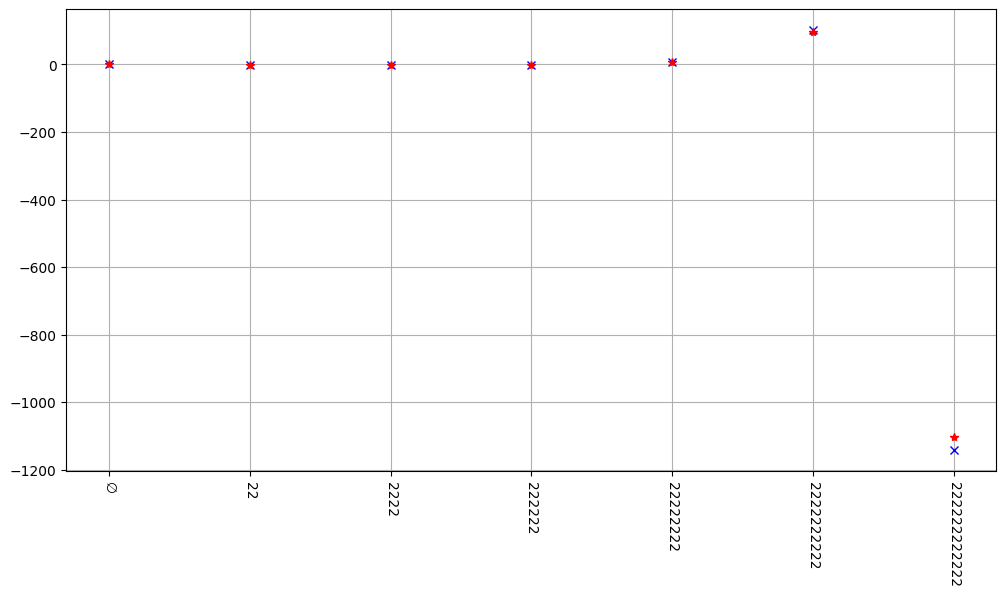

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))

ta.plot_coefficients(ts=psi, nonzero=True, ax=ax, color="b", marker="x")
ta.plot_coefficients(ts=psi_rk, nonzero=True, ax=ax, color="r", marker="*")

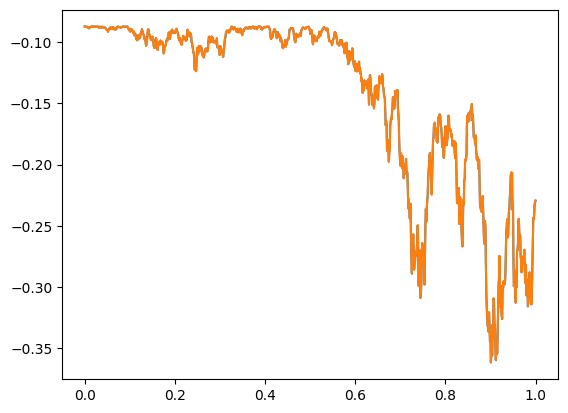

In [49]:
plt.plot(t_grid, (psi @ W_sig).real)
plt.plot(t_grid, (psi_rk @ W_sig).real)

In [51]:
np.exp(psi[""].squeeze()), np.exp(psi_rk[""].squeeze())

((0.9162784371915598+0j), (0.9162377796104239+0j))